# **Important Python Libraries :**

- **Librosa** : Python lib that provides tools used for audio processing (like analyzing & extracting info)

- **Soundfile** : Python lib used for reading and writing sound files (specially audio data)

- **Noisreduce** : Python lib that uses a noise reduce algo called "spectral gating" to remove noise from audio


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
pip install librosa

In [ ]:
pip install soundfile

In [ ]:
pip install noisereduce

In [ ]:
import IPython
from scipy.io import wavfile
import noisereduce as nr
import soundfile as sf
from noisereduce.generate_noise import band_limited_noise
import matplotlib.pyplot as plt
import urllib.request
import numpy as np
import io
import librosa
%matplotlib inline

## **Loading Input Audio File**

In [ ]:
url_1 = "/content/conversation-match-no noise.wav"
url_2 = "/content/conversation-mismatch-no noise.wav"

In [ ]:
# data_1, rate_1 = librosa.load(url_1)
# data_2, rate_2 = librosa.load(url_2)
data_3, rate_3 = librosa.load(url_3)

In [ ]:
IPython.display.Audio(data=data_1, rate=rate_1)

In [ ]:
IPython.display.Audio(data=data_2, rate=rate_2)

In [ ]:
IPython.display.Audio(data=data_3, rate=rate_3)

In [ ]:
noise_len1 =  10# seconds
noise1 = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data_1), samplerate=rate_1)*10
noise_clip1 = noise1[:rate_1*noise_len1]
audio_clip_band_limited1 = data_1+noise1

In [ ]:
noise_len2 =  13# seconds
noise2 = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data_2), samplerate=rate_2)*10
noise_clip2 = noise2[:rate_2*noise_len2]
audio_clip_band_limited2 = data_2+noise2

In [ ]:
noise_len3 =  200 #seconds
noise3 = band_limited_noise(min_freq=2000, max_freq = 12000, samples=len(data_3), samplerate=rate_3)*10
noise_clip3 = noise3[:rate_3*noise_len3]
audio_clip_band_limited3 = data_3+noise3

In [ ]:
IPython.display.Audio(data=audio_clip_band_limited1, rate=rate_1)

In [ ]:
IPython.display.Audio(data=audio_clip_band_limited2, rate=rate_2)

In [ ]:
IPython.display.Audio(data=audio_clip_band_limited3, rate=rate_3)

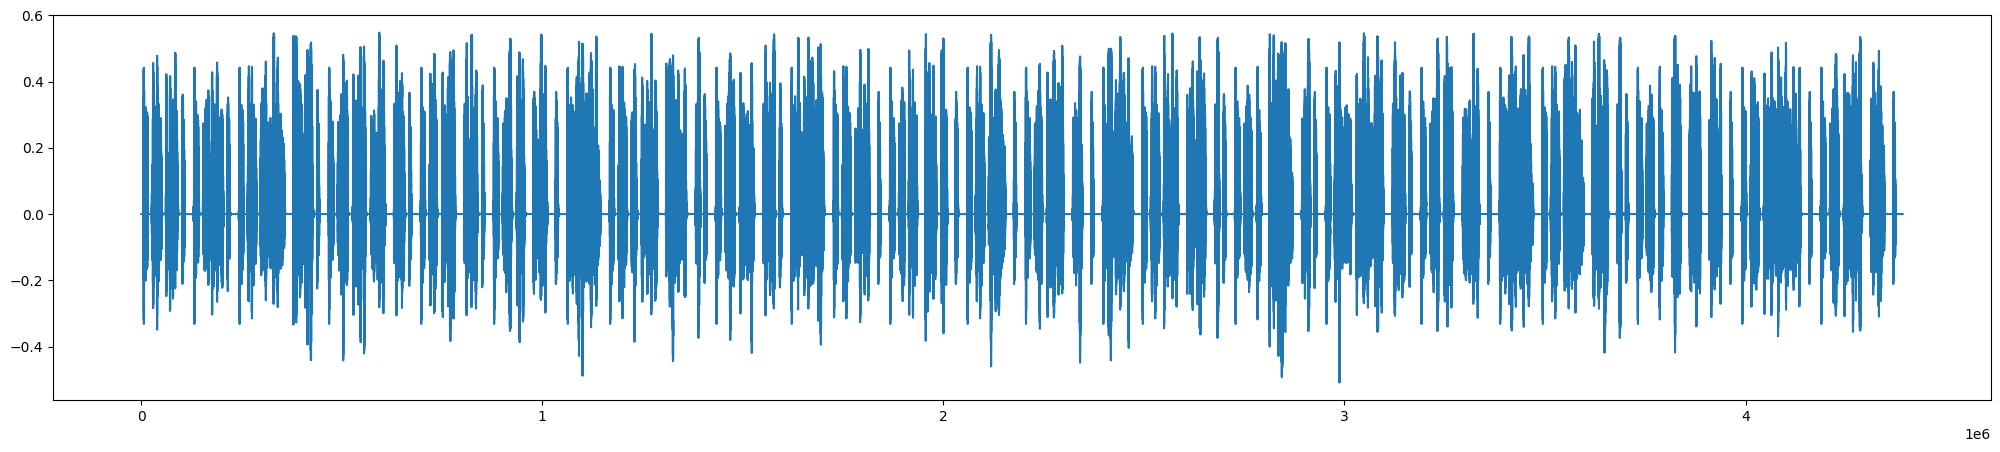

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(data_1)

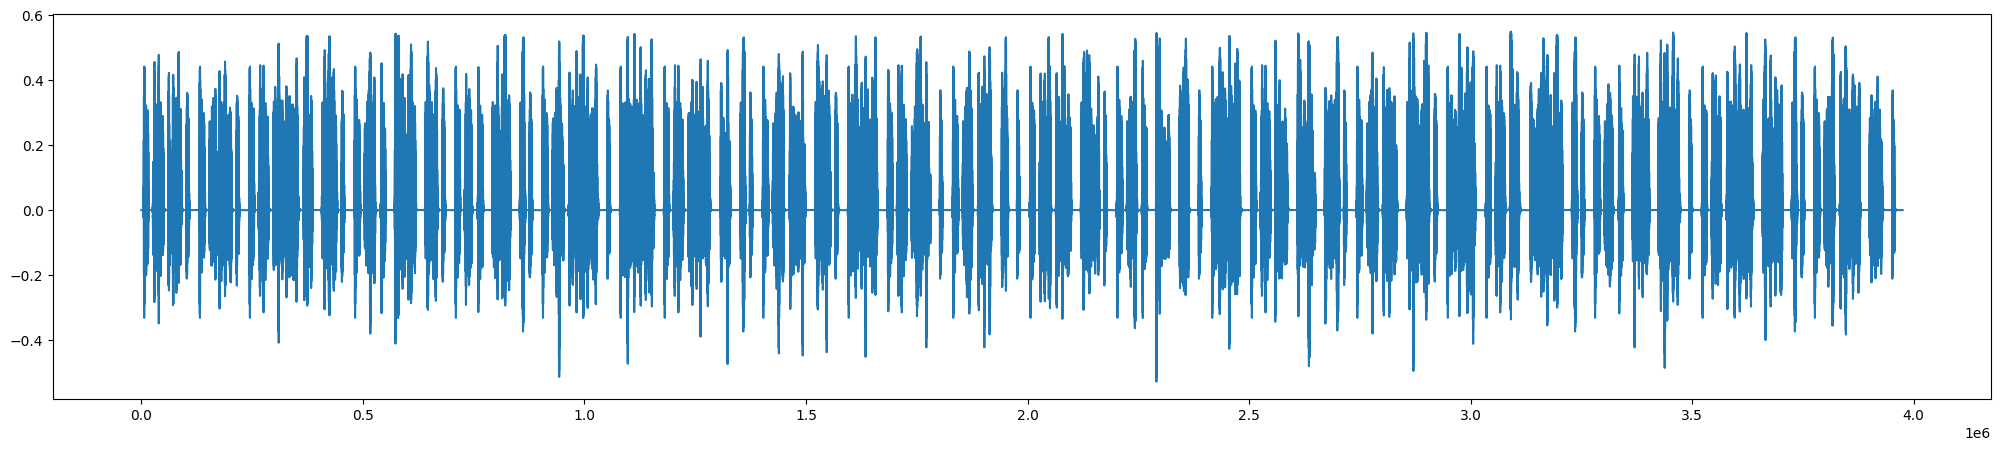

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(data_2)

## **Removing Stationary Noise**
  - only uses the intially estimated noise threshold

- ***Stationary Noise*** - noise whose statistical properties (like mean, variance, and autocorrelation) remain constant over time.

    *Ex* : Humming Noise

In [ ]:
reduced_noise_3 = nr.reduce_noise(y = data_3, sr=rate_3, n_std_thresh_stationary=1,stationary=True)

In [ ]:
reduced_noise_1 = nr.reduce_noise(y = data_1, sr=rate_1, n_std_thresh_stationary=1,stationary=True)
reduced_noise_2 = nr.reduce_noise(y = data_2, sr=rate_2, n_std_thresh_stationary=0.5,stationary=True)

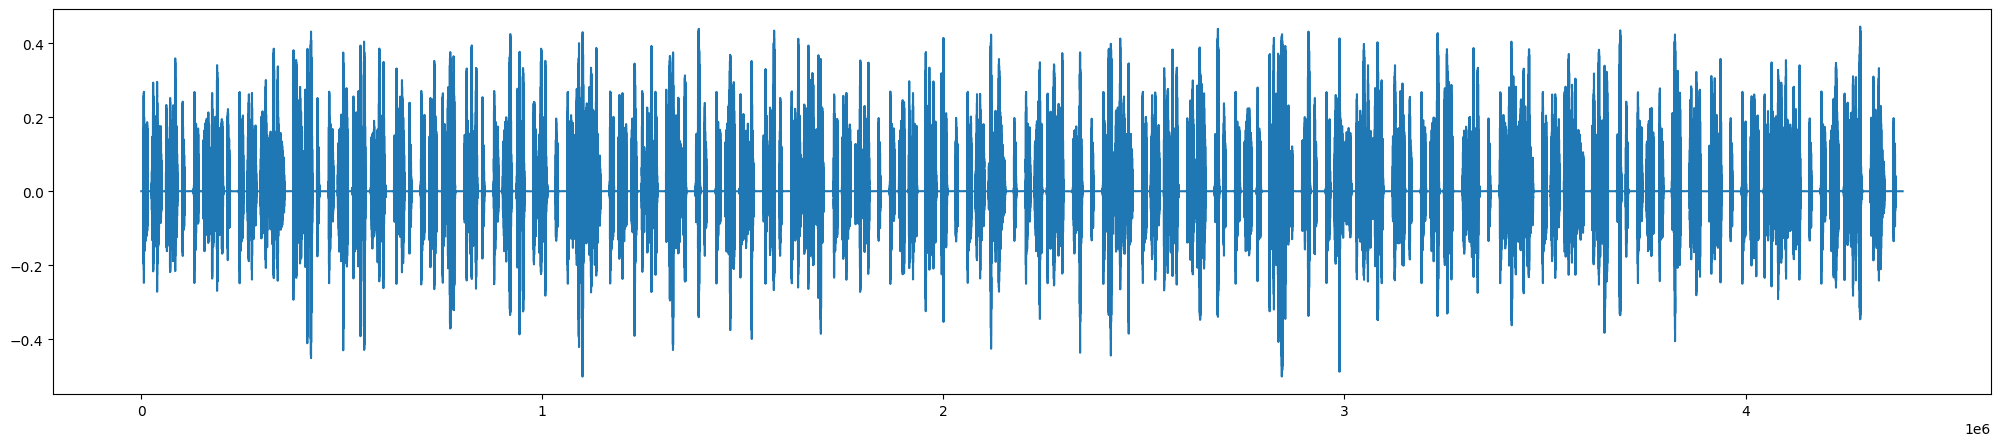

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_1)

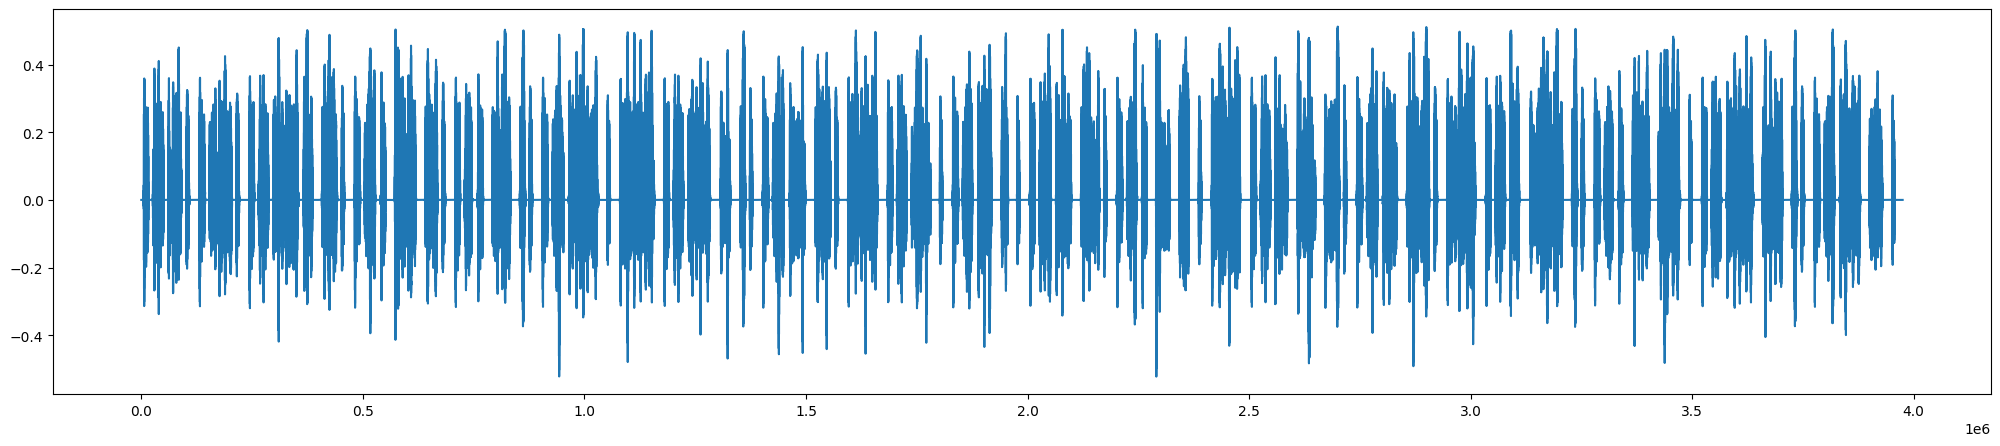

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_2)

In [ ]:
IPython.display.Audio(data=reduced_noise_1, rate=rate_1)

In [ ]:
IPython.display.Audio(data=reduced_noise_3, rate=rate_3)

In [ ]:
IPython.display.Audio(data=reduced_noise_2, rate=rate_2)

## **Removing Non-Stationary Noise**
 - keeps updating the intially estimated noise threshold during the process of noise reduction.

 - ***Non-Stationary Noise*** - noise whose statistical properties change over time.
  
  *Ex* : Enivronmental Noise (like Traffic, Crowd, Wind etc)

In [ ]:
reduced_noise_1 = nr.reduce_noise(y = data_1, sr=rate_1, n_std_thresh_stationary=1,stationary=True)
reduced_noise_2 = nr.reduce_noise(y = data_2, sr=rate_2, n_std_thresh_stationary=0.5,stationary=True)

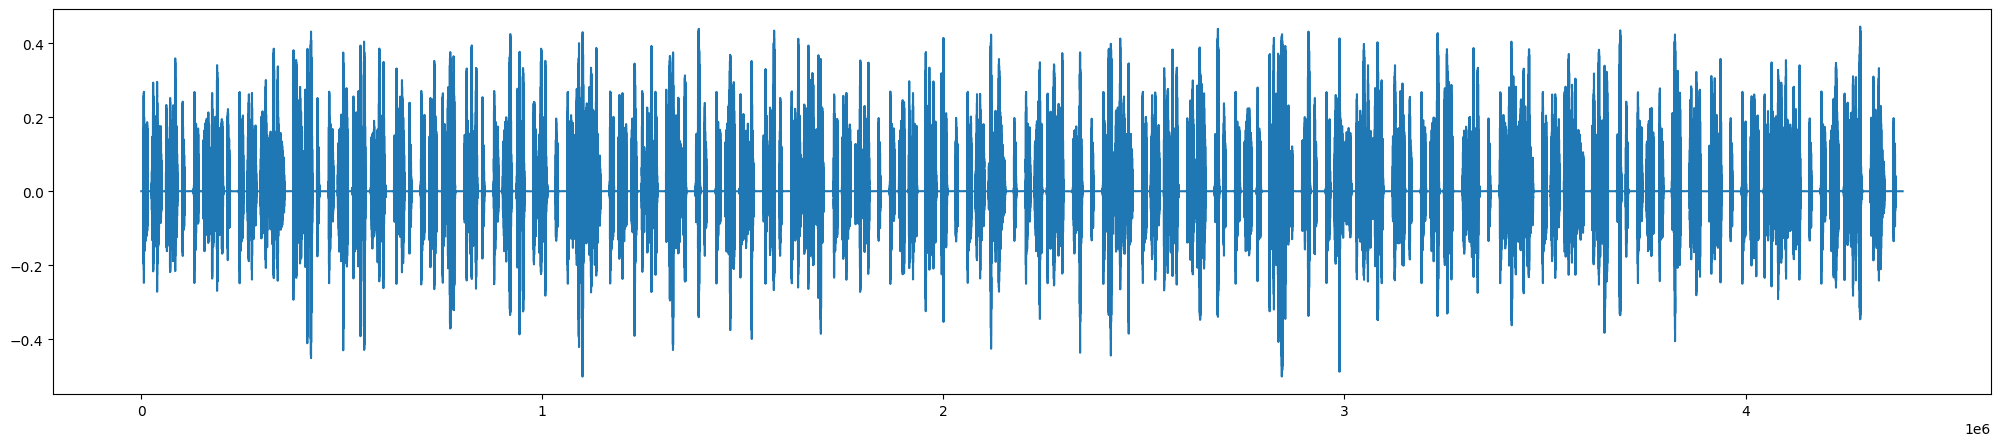

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_1)

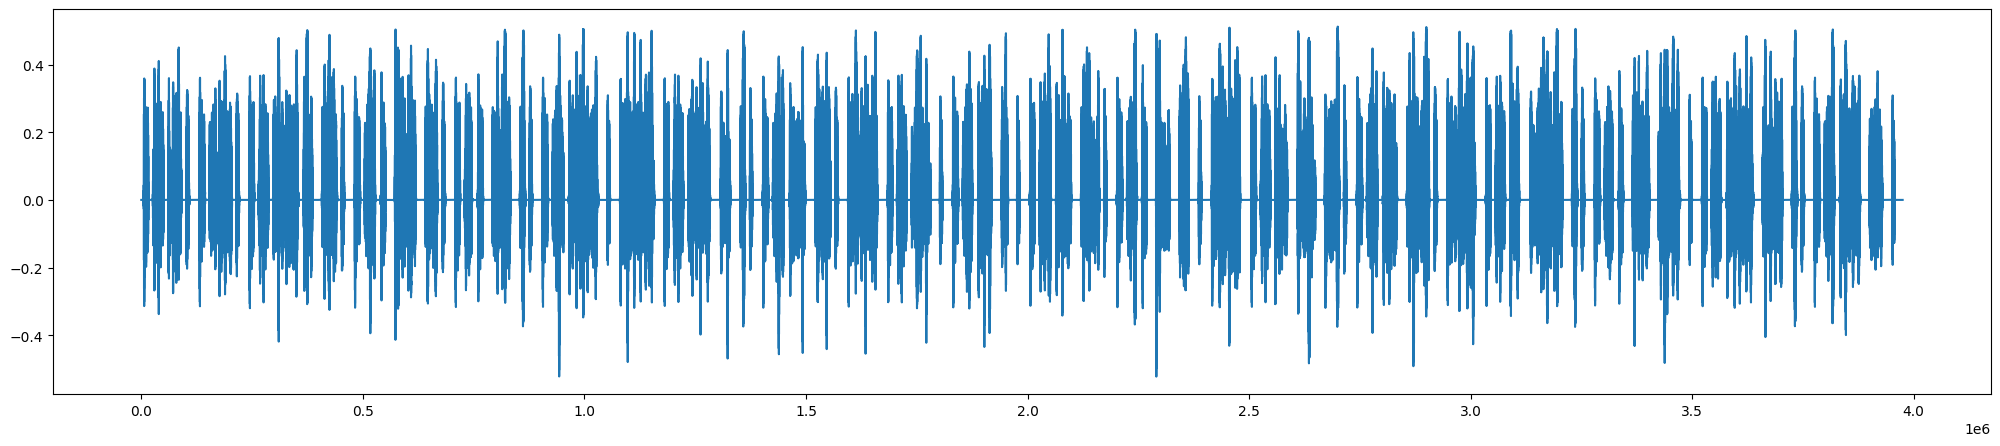

In [ ]:
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(reduced_noise_2)

In [ ]:
IPython.display.Audio(data=reduced_noise_1, rate=rate_1)

In [ ]:
IPython.display.Audio(data=reduced_noise_2, rate=rate_2)

In [ ]:
output_file_paths = [

    "/content/conversation_1.wav",
    "/content/conversation_2.wav"
]

In [ ]:
folder_prefix2 = 'noise-cancelled-audios/'

try:
    # Upload each output file to the 'noise-cancelled-audios' folder in S3
    for file_path in output_file_paths:
        # Use the basename of the file as the S3 object key
        object_key = folder_prefix2 + file_path.split('/')[-1]

        # Upload the file to S3
        with open(file_path, 'rb') as file:
            s3_client.upload_fileobj(file, bucket_name, object_key)

        print("Upload complete:", object_key)

except Exception as e:
    print("An error occurred:", e)

Upload complete: noise-cancelled-audios/conversation_1.wav
Upload complete: noise-cancelled-audios/conversation_2.wav
